In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("../data/eurusd_daily.csv")

# Parse date
df["Date"] = pd.to_datetime(df["Date"])
df.sort_values("Date", inplace=True)

df.tail()


,Date,Close,High,Low,Open,Volume
1840,2026-01-27,1.1876484155654907,1.1989833116531372,1.185185194015503,1.1874228715896606,0
1841,2026-01-28,1.2017642259597778,1.2023565769195557,1.1921935081481934,1.2022699117660522,0
1842,2026-01-29,1.1977769136428833,1.1994577646255493,1.1908447742462158,1.1976622343063354,0
1843,2026-01-30,1.1853959560394287,1.1977481842041016,1.1853959560394287,1.1971746683120728,0
0,NaT,EURUSD=X,EURUSD=X,EURUSD=X,EURUSD=X,EURUSD=X


In [3]:
# Make sure Close is numeric
df["Close"] = pd.to_numeric(df["Close"], errors="coerce")
# Technical indicators
df["SMA_20"] = df["Close"].rolling(20).mean()
df["SMA_50"] = df["Close"].rolling(50).mean()

delta = df["Close"].diff()
gain = delta.clip(lower=0).rolling(14).mean()
loss = (-delta.clip(upper=0)).rolling(14).mean()

rs = gain / loss
df["RSI"] = 100 - (100 / (1 + rs))

df.tail()


,Date,Close,High,Low,Open,Volume,SMA_20,SMA_50,RSI
1840,2026-01-27,1.187648,1.1989833116531372,1.185185194015503,1.1874228715896606,0,1.170281,1.167496,67.092515
1841,2026-01-28,1.201764,1.2023565769195557,1.1921935081481934,1.2022699117660522,0,1.171505,1.168300,75.051122
1842,2026-01-29,1.197777,1.1994577646255493,1.1908447742462158,1.1976622343063354,0,1.172657,1.169075,72.808791
1843,2026-01-30,1.185396,1.1977481842041016,1.1853959560394287,1.1971746683120728,0,1.173175,1.169620,64.555136
0,NaT,NaN,EURUSD=X,EURUSD=X,EURUSD=X,EURUSD=X,NaN,NaN,NaN


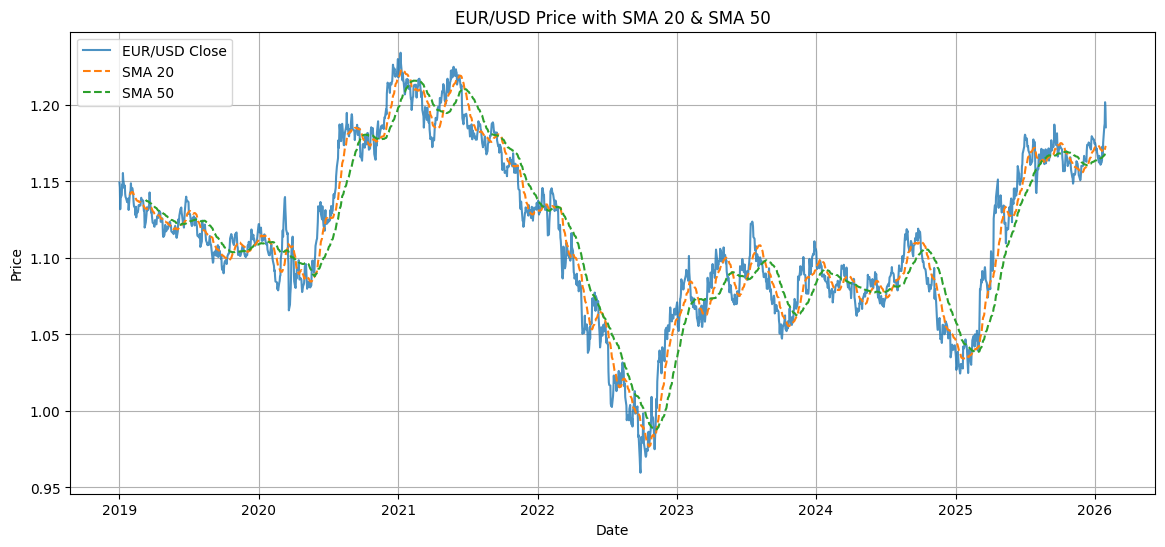

In [4]:
plt.figure(figsize=(14,6))

plt.plot(df["Date"], df["Close"], label="EUR/USD Close", alpha=0.8)
plt.plot(df["Date"], df["SMA_20"], label="SMA 20", linestyle="--")
plt.plot(df["Date"], df["SMA_50"], label="SMA 50", linestyle="--")

plt.title("EUR/USD Price with SMA 20 & SMA 50")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


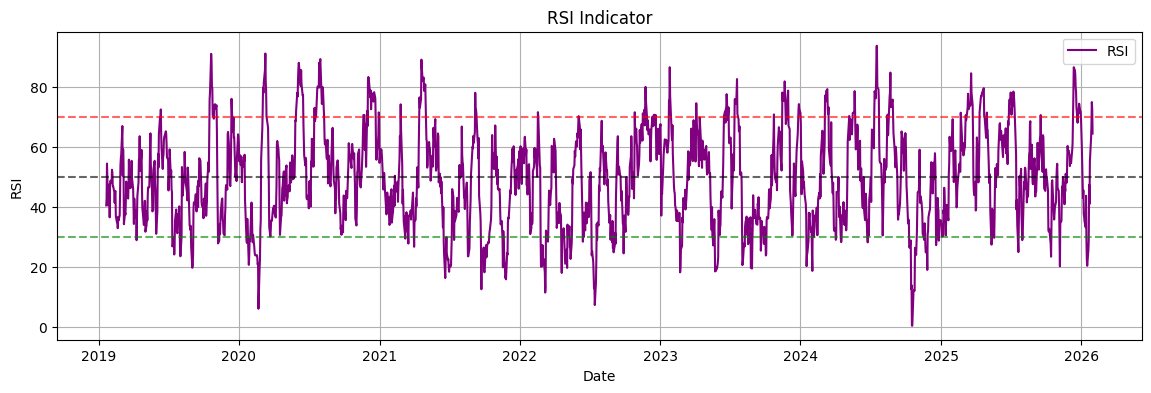

In [5]:
plt.figure(figsize=(14,4))

plt.plot(df["Date"], df["RSI"], label="RSI", color="purple")
plt.axhline(50, color="black", linestyle="--", alpha=0.6)
plt.axhline(70, color="red", linestyle="--", alpha=0.6)
plt.axhline(30, color="green", linestyle="--", alpha=0.6)

plt.title("RSI Indicator")
plt.xlabel("Date")
plt.ylabel("RSI")
plt.legend()
plt.grid(True)
plt.show()
